In [1]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

graphics_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/ND examples/Hidden nodes"

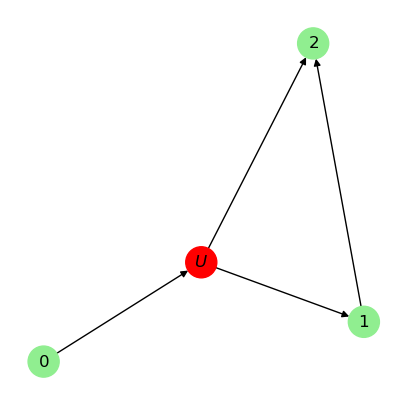

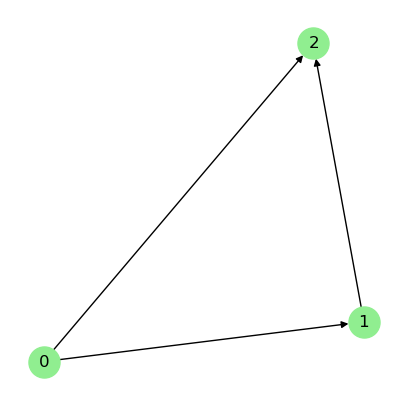

In [70]:
fig, ax = plt.subplots(1,1,figsize=(5,5))


# Directed graph from initial correlation structure (non-symmetric)
G = np.array([[0,1,0,0],
              [0,0,1,1],
              [0,0,0,1],
              [0,0,0,0]])
gr = nx.from_numpy_array(G, create_using = nx.DiGraph)
pos = graphviz_layout(gr)

# nx.draw(gr, pos=pos, node_size = 500, with_labels = True, nodelist=[i for i in range(4)] , ax = ax.flat[0], node_color='lightgreen')
labels = {}
labels[0] = r"$0$"
labels[1] = r"$U$"
labels[2] = r"$1$"
labels[3] = r"$2$"
nx.draw(gr, pos=pos, node_size = 500, ax = ax, node_color=['lightgreen', 'red','lightgreen','lightgreen' ])
nx.draw_networkx_labels(gr, pos = pos, labels=labels,  ax = ax)

plt.savefig(graphics_path + "/graph example w hidden.pdf", bbox_inches='tight')
plt.savefig(graphics_path + "/graph example w hidden", bbox_inches='tight')





# Directed graph from initial correlation structure (non-symmetric)
fig, ax = plt.subplots(1,1,figsize=(5,5))

G = np.array([[0,1,1],
              [0,0,1],
              [0,0,0]])
gr = nx.from_numpy_array(G, create_using = nx.DiGraph)
# pos = graphviz_layout(gr)
pos = { idx:pos[i] for idx, i in enumerate([0,2,3])}

# nx.draw(gr, pos=pos, node_size = 500, with_labels = True, nodelist=[i for i in range(4)] , ax = ax.flat[0], node_color='lightgreen')
labels = {}
labels[0] = r"$0$"
labels[1] = r"$1$"
labels[2] = r"$2$"
nx.draw(gr, pos=pos, node_size = 500, ax = ax, node_color='lightgreen')
nx.draw_networkx_labels(gr, pos = pos, labels=labels,  ax = ax)

plt.savefig(graphics_path + "/graph example wo hidden.pdf", bbox_inches='tight')
plt.savefig(graphics_path + "/graph example wo hidden", bbox_inches='tight')